<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

#concatenate axis =1 : 열방향(좌->우)으로 배열 합치기

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [7]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [8]:
np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [9]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.45998036, 0.83883052,
       0.02026337])

In [10]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.6239 - accuracy: 0.8103 - val_loss: 0.2553 - val_accuracy: 0.9239
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.2539 - accuracy: 0.9218 - val_loss: 0.2248 - val_accuracy: 0.9313
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1672 - accuracy: 0.9476 - val_loss: 0.1839 - val_accuracy: 0.9450
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1187 - accuracy: 0.9632 - val_loss: 0.1359 - val_accuracy: 0.9599
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.1422 - val_accuracy: 0.9578
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.1502 - val_accuracy: 0.9572
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.1419 - val_accuracy: 0.9604

**Plotting a validation accuracy comparison**

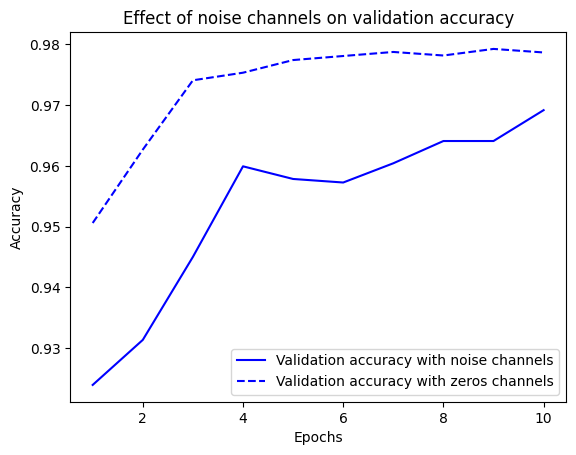

In [12]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

noisy information을 딥러닝 모델에 넣었을 때 퍼포먼스 하락
feature engineering을 통해 퍼포먼스 향상 가능할 수 있다

딥러닝에서 feature engineering이 필요하지 않다? 일부는 맞는 얘기

딥러닝에서는 모델이 중요한 feature를 스스로 learn, train 가능
하지만 feature engineering을 올바른 방식으로 한다면 더 나은 퍼포먼스를 얻을 수 있음

noisy dataset을 제거하는 게 딥러닝에서 여전히 중요

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3148 - accuracy: 0.1043 - val_loss: 2.3027 - val_accuracy: 0.1115
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2994 - accuracy: 0.1157 - val_loss: 2.3117 - val_accuracy: 0.1048
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2919 - accuracy: 0.1249 - val_loss: 2.3169 - val_accuracy: 0.1031
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2782 - accuracy: 0.1389 - val_loss: 2.3261 - val_accuracy: 0.1018
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2636 - accuracy: 0.1506 - val_loss: 2.3416 - val_accuracy: 0.1013
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2440 - accuracy: 0.1643 - val_loss: 2.3482 - val_accuracy: 0.0984
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2206 - accuracy: 0.1795 - val_loss: 2.3614 - val_accuracy:

라벨을 셔플 했음

0~9까지의 라벨을 분류하는 모델이니까 처음 train_accuracy는 0.1 정도

딥러닝에서 어떤 dataset으로도 train 하면 train_accuracy는 always 증가
하지만 val_accuracy를 보고 generalization power를 확인해야함

위의 사례에선 train_accuracy가 0.9정도로 높지만 val_accuracy는 0.1
generalization이 잘 이루어지지 않음

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary